# Three-body Stability

## Historical overview

The three-body problem ([**TBP**](https://en.wikipedia.org/wiki/Three-body_problem)) was developed and studied by Isaac Newton is his pioneering work, [the Principia](https://en.wikipedia.org/wiki/Philosophi%C3%A6_Naturalis_Principia_Mathematica).  In Newton's formulation, a solution to the TBP would analytically (exactly) describe the motion of the Moon under the influence of gravity from both the Earth and the Sun.  However, this problem would not be solved by Newton (or anyone).  

[King Oscar II](https://en.wikipedia.org/wiki/Oscar_II) commemorated his birthday in 1889 with a contest, where he invited the top scholars to attempt solutions to the TBP.  It was a French mathematician, [Henri Poincare](https://en.wikipedia.org/wiki/Henri_Poincar%C3%A9), at the University of Paris who "won" the contest.  Poincare showed that the TBP could not be solved due to an insufficient number of constants of motion (11) relative to the 18 equations of motion that generally define the problem.  In other words, the TBP is non-integrable does not have an unambiguous solution in terms of algebraic and transcendental functions.

Poincare showed that no solution to the general TBP exists, but some particular solutions do exist.  These solutions can have several requirements that are subsumed into the numenclature.  For example, the [circular-restricted TBP](https://farside.ph.utexas.edu/teaching/celestial/Celestial/node80.html) requires that the one body is much less massive than the other two (i.e., restricted $\rightarrow$ $m_3 \ll m_1$ and $m_3 \ll m_2$) and the two more massive bodies orbit one another on circular orbits.

Other solutions require central configurations, such as those proposed by Euler ([collinear](https://en.wikipedia.org/wiki/Euler%27s_three-body_problem)) and Lagrange ([equilateral triangle](https://en.wikipedia.org/wiki/Three-body_problem#Special-case_solutions)).  In 2013, physicists at the Insitute of Physics in Belgrade discovered 13 new families in the equal-mass, zero angular momentum TBP (see their [gallery](http://three-body.ipb.ac.rs/)).

Instead of searching for analytical solutions, others have used numerical approximations (or computational solutions) to solve the problem.  Although less elegant, such techniques are generally more practical because investigators can explore wide swathes of potenatial parameter space using modern parallel computing.  

This guide will focus on numerical approaches for the case of a planet orbiting a pair of binary stars.  In this case, the planet is (at most) a Jupiter-mass body and naturally requires the restricted TBP because the two primary bodies are stellar masses ($m_2>0.08\ M_\odot$; $m_1 \ge m_2$).  In 1982, Rudolf Dvorak defined three potential configurations of planets in binary systems: S-Type, P-Type, or T-Type (see Figure {numref}`{number}<planet_configs>`).

```{figure-md} planet_configs
<img src="https://www.astronomy.com/wp-content/uploads/sites/2/2023/02/exoplanetorbits.png?resize=600%2C369" alt="planet configurations"  width="600px">

Possible configurations of exoplanets in binary star systems ([Dvorak 1982](https://ui.adsabs.harvard.edu/abs/1982OAWMN.191..423D/abstract)).  The planet can orbit either star (S-Type), both stars, (P-Type), or along the orbit of the secondary as a Trojan (T-Type). Figure credit: [Astronomy: Roen Kelly](https://www.astronomy.com/science/can-solar-systems-exist-in-a-binary-star-system/).
```


## Updating the standard stability formulae

From ${\sim}1980-2000$, the growth of computational power allowed researchers to better understand the motion of three bodies.  In the 1980s, most numerical simulations were limited to ${\sim}10^3\ T_{\rm bin}$ (scaled by the binary orbital period $T_{\rm bin}$) in simulation time due to the excessive wall time required for the computations.  Many researchers turned to dynamical indicators of chaos (e.g., [Benettin et al. 1980](https://ui.adsabs.harvard.edu/abs/1980Mecc...15....9B/abstract), [Lecar et al. 1992](https://ui.adsabs.harvard.edu/abs/1992AJ....104.1230L/abstract),  [Smith & Szebehely 1993](https://ui.adsabs.harvard.edu/abs/1993CeMDA..56..409S/abstract), [Froeschle et al. 1997](https://ui.adsabs.harvard.edu/abs/1997CeMDA..67...41F/abstract)) to identify *possible routes* to unstable orbits. 

[Dvorak (1986)](https://ui.adsabs.harvard.edu/abs/1986A%26A...167..379D/abstract) and [Rabl & Dvorak (1988)](https://ui.adsabs.harvard.edu/abs/1988A%26A...191..385R/abstract) showed that there is a transition between regular (periodic), quasi-periodic, and chaotic orbits for planets in binaries.  Unstable (or unbound) orbits are non-periodic, which can overlap in type with chaotic orbits.  There are chaotic orbits that remain bound to the system.  Therefore, chaos **does not** imply instability.

Orbital chaos is a sensitivity to initial conditions, which means that starting the planet or binary at slightly different positions can result in a drastically different orbital behavior.  Starting the planet a degree ahead (or behind) in its orbit through its initial mean (or true) anomaly means that the planet will feel a slightly different net force initially.  This slight difference in net force can speed up (or slow down) the planet and lead to an increase in its orbital eccentricity.  The secondary star can 

- "pump" the planet's orbital eccentricity through exchanges of angular momentum, or 
- scatter the planet (change in planetary semimajor axis) through exchanges of orbital energy.

[Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) focused on the potential to scatter a single planet.  They performed numerical simulations with the following assumptions:

1. The planet does not influence the orbit of the host binary (i.e., a test (zero-mass) particle).
2. The planet begins on a circular, coplanar orbit (relative to the host binary).
3. The planet and binary orbits can be scaled hierarchically, where the initial planetary **semimajor axis ratio** is $\rho = a_p/a_{\rm bin}$.
4. The binary masses are scaled by the **mass ratio** $\mu = m_2/(m_1+m_2)$, where $m_1\ge m_2$.
5. A critical semimajor axis $a_c$ exists for the planet where planets with 
   - $a_p \leq a_c$ are bound for $10^4$ binary orbits (i.e., scaled by $T_{\rm bin}$) and 
   - $a_p > a_c$ are unbound within a time $t<10^4\ T_{\rm bin}$.
6. The planetary and binary orbits are initially aligned $(\omega_p = \omega_{\rm bin})$, where the binary begins at either periastron $(f_{\rm bin} = 0^\circ)$ or apastron $(f_{\rm bin} = 180^\circ)$.

These are not bad assumptions considering the computing power and knowledge of planetary systems during the late 1990s.  For a given mass ratio $\mu$, and binary eccentricity $e_{\rm bin}$, an initial condition $(\rho,\ f_p)$ is evaluated.  The semimajor axis ratio range differs for S-Type $(0.02\leq \rho \leq 0.5)$ and P-Type $(1\leq \rho \leq 5)$ (see Figure {numref}`{number}<planet_configs>`).  But eight equidistant values of the planetary true anomaly ($f_p = 0^\circ - 315^\circ;\ 45^\circ$ increments) are used.  *Note that the planetary mean anomaly $M$ and true anomaly $f$ are interchangeable for **circular** orbits.*

```{figure-md} planet_ICs
<img src="threebody_stability/HW_Table1.png" alt="HW Table 1"  width="400px">

Initial conditions used in [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) for both S-Type and P-Type planets.
```

This is a 4D space, where two dimensions $(\mu\ \&\ e_{\rm bin})$ depend on the host binary, while the other two dimensions $(\rho\ \&\ f_p)$ depend on the planet's initial position.  It can be easier to conceptualize traversing this space through a 2D grid within another 2D grid as shown in Figure {numref}`{number}<param_grid>`.

```{figure-md} param_grid
<img src="threebody_stability/HW_4dim.png" alt="HW dimensions"  width="400px">

A 4D parameter space abstracted into two nested 2D grids.
```

The results of each nested grid can be summarized by identifying a critical semimajor axis ratio $\rho_{\rm cr}$ for a given $(\mu,\ e_{\rm bin})$ combination.  The critical semimajor axis ratio $\rho_{\rm cr}$ is defined as the boundary between stable and unstable initial conditions $(\rho,\ f_p)$:

- one side of the boundary has a planet that survives the full simulation time for all values of $f_p$
- the other side has simulations that terminate early due to close approaches (i.e., scatters) with either star or an escape from the system.

Table {numref}`{number}<stability_grid1>` shows the results for $\mu = e_{\rm bin} = 0.5$ from [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) for S-Type planets, where the $"+"$ symbols denote stable (i.e., no scatters or escapes).

```{figure-md} stability_grid1
<img src="threebody_stability/HW_Table2.png" alt="HW Table 2"  width="600px">

Planet survival results for $\mu = e_{\rm bin} = 0.5$ from [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) for S-Type planets.
```

Table {numref}`{number}<stability_grid2>` shows data that has been reduced, where each cell in the table represents the critical semimajor axis $\rho_{\rm cr}$ determined through a smaller grid similar to Table {numref}`{number}<stability_grid1>`.

```{figure-md} stability_grid2
<img src="threebody_stability/HW_Table3.png" alt="HW Table 3"  width="600px">

Planetary critical semimajor axis $\rho_{\rm cr}$ from [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) for S-Type planets.
```

From Table {numref}`{number}<stability_grid2>`, [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) perform a least-squares fit given the trial function:

```{math}
:label: HW_formula
\rho_{\rm cr} = c_1 + c_2\mu + c_3e_{\rm bin} + c_4\mu e_{\rm bin} + c_5 e_{\rm bin}^2 + c_6 \mu e_{\rm bin}^2.
```

The least-squares fitting procedure identifies values of $c_1-c_6$ that minimizes $\chi^2$ (e.g., the residuals or cost function).  

The above procedure has merits in that it will accurately reproduce the critical semimajor axis $\rho_{\rm cr}$ for other parts of the $(\mu,\ e_{\rm bin})$ parameter space through an easy-to-use polynomial.  However, larger discrepancies appear when extrapolating to broad regimes of mass ration $\mu$ (e.g., $\mu \leq 0.1$ and $\mu \geq 0.9$).  There can be significant differences if the planetary orbit is misaligned with the host binary, which is expected from disk observations in binaries (e.g., [Monin et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006A%26A...446..201M/abstract)).

[Quarles et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...80Q/abstract) addresses these issues in two ways:

1. expand the simulations to cover a wider range in $\mu$ and increase the grid resolution,
2. evaluate the simulations for a range of planet inclinations.

Figure {numref}`{number}<stability_grid3>` illustrates the results of [Quarles et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...80Q/abstract), where the color-code represents $\rho_{cr}$ and each panel assumes a different initial inclination for the planet.

```{figure-md} stability_grid3
<img src="threebody_stability/Q20_Fig7.png" alt="Q20 Fig 7"  width="600px">

Planetary critical semimajor axis $\rho_{\rm cr}$ (color-coded) from [Quarles et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...80Q/abstract) for S-Type planets.  Each panel illustrates how the value of $\rho_{\rm cr}$ changes with planetary inclination.
```

The above parameter spaces can also be fit using the same trial function (Eq. {eq}`HW_formula`), but the data underlying the above figure is available in a GitHub repo [saturnaxis:ThreeBody_Stability](https://github.com/saturnaxis/ThreeBody_Stability).  Using the data file for the coplanar case and interp2D, one can easily identify $\rho_{\rm cr}$.

In [174]:
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

mu = 0.5
ebin = 0.5

github_file = "https://raw.githubusercontent.com/saturnaxis/ThreeBody_Stability/master/a_crit_Incl[0].txt"
data = np.genfromtxt(github_file,delimiter=',',comments='#')

X = data[:,0]
Y = data[:,1]
Z = data[:,2]

xi = np.concatenate(([0.001],np.arange(0.01,1,0.01),[0.999]))
yi = np.arange(0,0.81,0.01)
zi = griddata((X,Y),Z,(xi[None,:],yi[:,None]),method = 'linear',fill_value=0)

f = interp2d(xi, yi, zi, kind='linear')

astab = f(mu,ebin)[0]
print("For mu = %1.2f, e_bin = %1.2f, the critical semimajor axis ratio rho_cr = %1.2f" % (mu, ebin,astab))

For mu = 0.50, e_bin = 0.50, the critical semimajor axis ratio rho_cr = 0.12


A nearly identical procedure can be applied to determine the critical semimajor axis ratio for P-Type planets using the GitHub repo [saturnaxis:CBP_stability](https://github.com/saturnaxis/CBP_stability).

In [173]:
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

mu = 0.2937/(1 + 0.2937)  #converting from q --> mu  Doyle et al. (2011)
ebin = 0.15944

github_file = "https://raw.githubusercontent.com/saturnaxis/CBP_stability/master/a_crit.txt"
data = np.genfromtxt(github_file,delimiter=',',comments='#')

X = data[:,0]
Y = data[:,1]
Z = data[:,2]

xi = np.concatenate(([0.001],np.arange(0.01,1,0.01),[0.999]))
yi = np.arange(0,0.81,0.01)
zi = griddata((X,Y),Z,(xi[None,:],yi[:,None]),method = 'linear',fill_value=0)

f = interp2d(xi, yi, zi, kind='linear')

astab = f(mu,ebin)[0]
print("For mu = %1.2f, e_bin = %1.2f, the critical semimajor axis ratio rho_cr = %1.2f" % (mu, ebin,astab))

For mu = 0.23, e_bin = 0.16, the critical semimajor axis ratio rho_cr = 2.70


## Stability for planets in binary systems

Determining the stability for a P-Type or S-Type planet requires asking a few questions:

1. Does the planet remain in orbit around the central binary?
    -  If so, for how long?
2. Do the planetary orbital elements vary in time?
    -  Are the variations in orbital elements bounded?
    -  Does the planetary eccentricity grow secularly?
3. Does the central binary force the planetary orbit?

Below are a few numerical experiments for a known circumbinary planet, Kepler-16b ([Doyle et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011Sci...333.1602D/abstract)).

### A sample simulation (Kepler-16b)

To start exploring the dynamics of Kepler-16b ([Doyle et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011Sci...333.1602D/abstract)), we create a simulation in **rebound** using the parameters from the discovery paper.  To customize the simulation, we define  

- tscale: the number of years that we want to run the simulation.
- output_bin: the name (as a string) of the output binary file that stores the simulation archive.
- output_steps: the number of steps (as an integer) that simulation archive will wait until saving a system state.

The code below demonstrates a short simulation of only 10 years to show the orbit of the planet and central binary.

In [166]:
import rebound
import numpy as np
import os

M_J = 9.54e-4 #Jupiter mass in Msun

#Kepler-16 parameters from Doyle et al. (2011)
M_A = 0.6897 #mass of star A in Msun
M_B = 0.20255 #mass of star B in Msun
a_bin = 0.22431 #binary semimajor axis in AU
T_bin = 41.079220/365.25 #binary orbital period in yr
e_bin = 0.15944 #binary eccentricity
inc_bin = np.radians(90.30401) #binary inclination on the sky plane
omg_bin = np.radians(263.464) #binary argument of periapse
RA_bin = 0 #binary longitude of nodes
MA_bin = np.radians(92.352) - omg_bin #binary mean anomaly from mean longitude

M_p = 0.333*M_J
a_p = 0.7048 #planet semimajor axis in AU
T_p = 228.776/365.25 #planetary orbital period in yr
e_p = 0.0069 
inc_p = np.radians(90.0322) #planetary inclination on the sky plane
omg_p = np.radians(318) #planetary argument of periapse
RA_p = np.radians(0.003) # planetary longitude of nodes
MA_p = np.radians(106.51) - omg_p #planetary mean anomaly from mean longitude

def simulation(tscale,fname,out_step):
    sim = rebound.Simulation()
    sim.integrator = 'ias15'
    sim.units = ('AU','yr','Msun')
    sim.dt = 0.025*T_bin

    sim.add(m=M_A)
    sim.add(m=M_B,a=a_bin,e=e_bin,inc=inc_bin,omega=omg_bin,Omega=RA_bin,M=MA_bin) 
    sim.move_to_com()
    sim.add(m=M_p,a=a_p,e=e_p,inc=inc_p,omega=omg_p,Omega=RA_p,M=MA_p)

    sim.automateSimulationArchive(fname,step=out_step,deletefile=True)
    sim.integrate(tscale)

output_bin = "Kepler16.bin"
output_steps = 20
simulation(10,output_bin,output_steps)

Now that a simulation has been run, we want to visualize the orbit.  However, the input coordinates were given using the sky plane.  Therefore, we will need to rotate the position vector to give us a face-on view of the system. Alternatively, we could have used the $x-z$ plane to get the same view.  

The code below extracts the Cartesian coordinates from the simulation archive and creates a visualization using `matplotlib`.

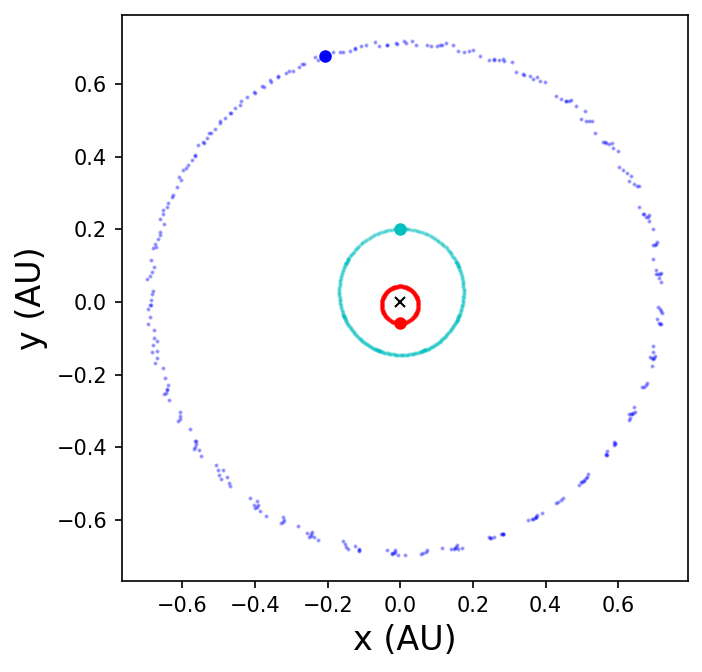

In [167]:
import rebound
import numpy as np
import matplotlib.pyplot as plt 

def Rot(ang1,ang2,x):
    rot_omg = np.array([[np.cos(ang1),-np.sin(ang1),0],[np.sin(ang1),np.cos(ang1),0],[0,0,1]])
    rot_inc = np.array([[1, 0, 0], [0,np.cos(ang2),-np.sin(ang2)],[0,np.sin(ang2),np.cos(ang2)]])
    rot_mat = np.dot(rot_omg,rot_inc)
    return np.dot(rot_mat,x)

#plot the simulation
sa = rebound.SimulationArchive(output_bin)

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.plot(0,0,'kx',ms=5)
xy_coords = np.zeros((len(sa),6))
for s in range(0,len(sa)):
    sim = sa[s] #iterate through each snapshot in sa
    ps = sim.particles #intermediate object to simplify the referencing
    sim.move_to_com() #shift to center-of-mass coordinates
    for p in range(0,len(ps)):
        Cart = np.array([ps[p].x, ps[p].y, ps[p].z])
        rot_xy = Rot(-ps[1].Omega,-ps[1].inc,Cart)
        xy_coords[s,2*p] = rot_xy[0] 
        xy_coords[s,2*p+1] = rot_xy[1]

color = ['r','c','b']
for p in range(0,3):   
    ax.plot(xy_coords[:,2*p],xy_coords[:,2*p+1],'.',color=color[p],ms=2,alpha=0.3)
    ax.plot(xy_coords[0,2*p],xy_coords[0,2*p+1],'.',color=color[p],ms=10)

ax.set_xlabel("x (AU)",fontsize=16)
ax.set_ylabel("y (AU)",fontsize=16);

In the above figure, barycentric coordinates are used so that we can see the changing position of star A (red) and star B (cyan) relative to the center-of-mass ($\times$ symbol) at the origin.  Those orbits are Keplerian because the planetary mass is insufficient to strongly perturb the inner binary (at least on this scale).  

The planetary orbit is *not Keplerian* because it experiences a varying perturbation from the inner binary.  As a result, the planet's position jitters about some average orbit.  Moreover, there is some change in the planet's semimajor axis, which causes its orbital period to change slightly from one orbit to the next.

To understand the long-term dynamics, a simulation of at least 100 years is needed.  The nodal precession timescale for the planet is ${\sim}50$ years, where 100 years represents two full oscillations of the apsidal precession.  Since we are not as interested in the short-term dynamics, we can increase the number of output steps so that the simulation remains fast (in wall time).

In [168]:
output_bin = "Kepler16_long.bin"
output_steps = 200
simulation(100,output_bin,output_steps)

Again, the dynamics is best understood through a series of figures that show how the orbit is changing with time.

forced eccentricity e_F = 0.034; forced periapse w_F = 278.553


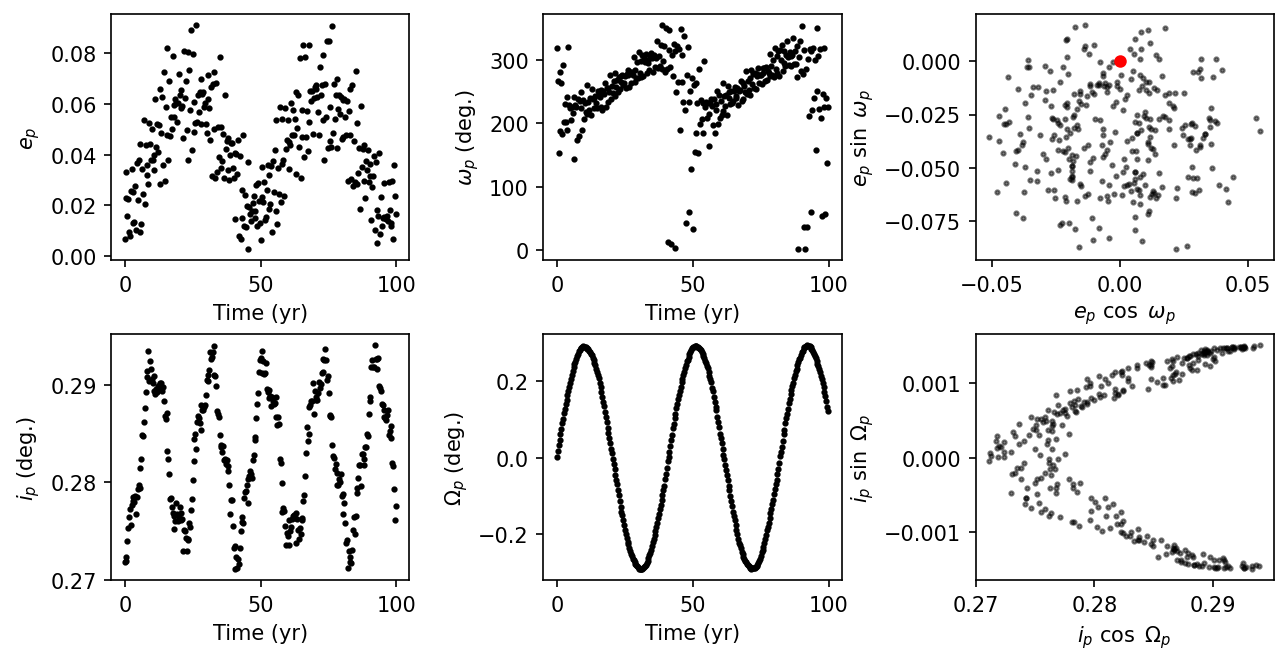

In [169]:
import rebound
import numpy as np
import matplotlib.pyplot as plt 

#plot the simulation
sa = rebound.SimulationArchive(output_bin)

fig = plt.figure(figsize=(10,5),dpi=150)
ax11 = fig.add_subplot(231)
ax12 = fig.add_subplot(232)
ax13 = fig.add_subplot(233)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235)
ax23 = fig.add_subplot(236)

pl_orb = np.zeros((len(sa),6))
time = np.zeros(len(sa))
for s in range(0,len(sa)):
    sim = sa[s] #iterate through each snapshot in sa
    ps = sim.particles #intermediate object to simplify the referencing
    sim.move_to_com() #shift to center-of-mass coordinates
    time[s] = sim.t
    del_Omega = ps[2].Omega - ps[1].Omega
    omg_p = ps[2].omega
    mut_incl = np.arccos(np.cos(ps[1].inc)*np.cos(ps[2].inc) + np.sin(ps[1].inc)*np.sin(ps[2].inc)*np.cos(del_Omega))
    pl_orb[s,:] = [ps[2].a,ps[2].e,np.degrees(mut_incl),omg_p,del_Omega,ps[2].M]

#calculate the vector components of eccentricity and inclination
ecosw, esinw = pl_orb[:,1]*np.cos(pl_orb[:,3]), pl_orb[:,1]*np.sin(pl_orb[:,3])
icosO, isinO = pl_orb[:,2]*np.cos(pl_orb[:,4]), pl_orb[:,2]*np.sin(pl_orb[:,4])

e_F = np.sqrt(np.mean(ecosw)**2 + np.mean(esinw)**2)
w_F = np.mean(np.arctan2(esinw,ecosw))
print("forced eccentricity e_F = %1.3f; forced periapse w_F = %1.3f" % (e_F,np.degrees(w_F)+360))

ax11.plot(time,pl_orb[:,1],'k.',ms=4)
ax11.set_ylabel("$e_p$")
ax12.plot(time,np.degrees(pl_orb[:,3]),'k.',ms=4)
ax12.set_ylabel("$\omega_p$ (deg.)")
ax13.plot(ecosw,esinw,'k.',ms=4,alpha=0.5)
ax13.set_ylabel("$e_p\ \sin\ \omega_p$")
ax13.plot(0,0,'r.',ms=10)

ax11.set_xlabel("Time (yr)")
ax12.set_xlabel("Time (yr)")
ax12.set_yticks(np.arange(0,360+60,60))
ax13.set_xlabel("$e_p\ \cos\ \omega_p$")

ax21.plot(time,pl_orb[:,2],'k.',ms=4)
ax21.set_ylabel("$i_p$ (deg.)")
ax22.plot(time,np.degrees(pl_orb[:,4]),'k.',ms=4)
ax22.set_ylabel("$\Omega_p$ (deg.)")
ax23.plot(pl_orb[:,2]*np.cos(pl_orb[:,4]),pl_orb[:,2]*np.sin(pl_orb[:,4]),'k.',ms=4,alpha=0.5)
ax23.set_ylabel("$i_p\ \sin\ \Omega_p$")

ax21.set_xlabel("Time (yr)")
ax22.set_xlabel("Time (yr)")
ax23.set_xlabel("$i_p\ \cos\ \Omega_p$")

fig.subplots_adjust(wspace=0.45,hspace=0.3);

The above figures show the evolution of the planet's eccentricity and inclination vectors.  The planetary eccentricity vector illustrates how the shape of the orbit changes over time **and** how the orbit can rotate relative to the binary orbital plane.  The inclination vector represents how the planetary orbit can tilt and wobble with time (i.e., like a plate on a table).  Each of these vectors can have two components: **free** and **forced**.  The forced component shifts the mean value of the vectors away from the origin.

The top-left panel shows the planetary eccentricity  $e_p$ changing over 100 years, while the top-middle panel shows the evolution of the planetary argument of periapse $\omega_p$.  The forced component increases the mean eccentricity to $0.034$, while the argument of periapse is ${\sim}278^\circ$.  The top-right panel shows how the direction of the eccentricity vector changes over the simulation.  The red dot marks the origin, where in the absence of a forced component it would lie in the center.  Instead, all the points appear to orbit a fixed point with a radius equal to the forced eccentricity $e_F$ and rotated by an angle equal to the forced argument of periapsis $\omega_F$, in polar coordinates.

The bottom row represents similar panels, but using the planetary inclination $i_p$ and longitude of ascending node $\Omega_p$. The planetary orbit appears to couple tightly with the binary orbit.  Naively, this would suggest that the system will continue to transit indefinitely.  However, we must consider that the inclination shown here is the **mutual inclination** and if the binary orbital plane tilts relative to our line-of-sight, then the planetary orbit will also tilt along with it.  As a result, our ability to view Kepler-16b transiting its host star is temporary and will only occur when the alignment is just right (e.g., the transit of Venus or Mercury across our Sun).  More broadly, the circumbinary planet community has dubbed this ability to transit as *transitability* (see [Martin & Triaud (2015)](https://ui.adsabs.harvard.edu/abs/2015MNRAS.449..781M/abstract) and [Martin (2017)](https://ui.adsabs.harvard.edu/abs/2017MNRAS.465.3235M/abstract) for more details). 

### A sample simulation ($\gamma$ Cephei Ab)

A similar analysis can be performed for an S-Type planet, which orbits only one of the two stars in the binary system.  Such planets typically orbit ${\sim}1-2\ {\rm AU}$ from their host star, while the binary separation is ${\gtrsim}20\ {\rm AU}$.  One of the first S-Type planets discovered is in $\gamma$ Cephei AB (e.g., [Campbell et al. (1988)](https://ui.adsabs.harvard.edu/abs/1988ApJ...331..902C/abstract), [Hatzes et al. (2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...599.1383H/abstract)).  This example uses parameters from [Huang & Ji (2022)](https://ui.adsabs.harvard.edu/abs/2022AJ....164..177H/abstract), who refit the system using astrometric data from [Reffert & Quirrenbach (2011)](https://ui.adsabs.harvard.edu/abs/2011A%26A...527A.140R/abstract).

To start exploring the dynamics of $\gamma$ Cep Ab ([Huang & Ji (2022)](https://ui.adsabs.harvard.edu/abs/2022AJ....164..177H/abstract)), we create a simulation in **rebound** using the parameters from this paper.  To customize the simulation, we define  

- tscale: the number of years that we want to run the simulation.
- output_bin: the name (as a string) of the output binary file that stores the simulation archive.
- output_steps: the number of steps (as an integer) that simulation archive will wait until saving a system state.

The code below demonstrates a short simulation of only 100 years to show the orbit of the planet and binary.  The integration step `sim.dt` is now a fraction of the planetary orbit because its orbital period is much shorter than the binary orbital period.  

In [262]:
import rebound
import numpy as np
import os

M_J = 9.54e-4 #Jupiter mass in Msun

#Parameters from Huang & Ji (2022)
M_A = 1.40 #mass of star A in Msun
M_B = 0.39 #mass of star B in Msun
a_bin = 18.64 #binary semimajor axis in AU
T_bin = np.sqrt(a_bin**3/(M_A+M_B)) #binary orbital period in yr
e_bin = 0.36 #binary eccentricity
inc_bin = np.radians(119.3) #binary inclination on the sky plane
omg_bin = np.radians(158.9) #binary argument of periapse
RA_bin = 18.04 #binary longitude of nodes
MA_bin = np.radians(296.12) #binary mean anomaly from posterior plot


a_p = 2.14 #planet semimajor axis in AU
T_p = np.sqrt(a_p**3/M_A) #planetary orbital period in yr
e_p = 0.085 
inc_p = np.radians(173) #planetary inclination on the sky plane
omg_p = np.radians(55) #planetary argument of periapse
RA_p = np.radians(356) # planetary longitude of nodes
MA_p = np.radians(264) #planetary mean anomaly from posterior plot
M_p = 1.63*M_J/np.sin(inc_p) #Planet mass in Msun from msini

def simulation(tscale,fname,out_step):
    sim = rebound.Simulation()
    sim.integrator = 'whfast'
    sim.units = ('AU','yr','Msun')
    sim.dt = 0.0125*T_p

    sim.add(m=M_A)
    sim.add(m=M_p,a=a_p,e=e_p,inc=inc_p,omega=omg_p,Omega=RA_p,M=MA_p)
    sim.add(m=M_B,a=a_bin,e=e_bin,inc=inc_bin,omega=omg_bin,Omega=RA_bin,M=MA_bin) 
    sim.move_to_com()

    sim.automateSimulationArchive(fname,step=out_step,deletefile=True)
    sim.integrate(tscale)

output_bin = "gammaCep.bin"
output_steps = 5
simulation(100,output_bin,output_steps)

Now that a simulation has been run, we want to visualize the orbit.  However, the input coordinates were given using the sky plane.  Therefore, we will need to rotate the position vector (using the *inclination of the binary*) to give us a face-on view of the system.

```{note}
The planetary orbit is **not** coplanar with the outer binary orbit and the binary orbit is not coplanar with the sky plane.  As a result, some parts of each orbit will be above or below the reference plane.
```

The code below extracts the Cartesian coordinates from the simulation archive and creates a visualization using `matplotlib`.

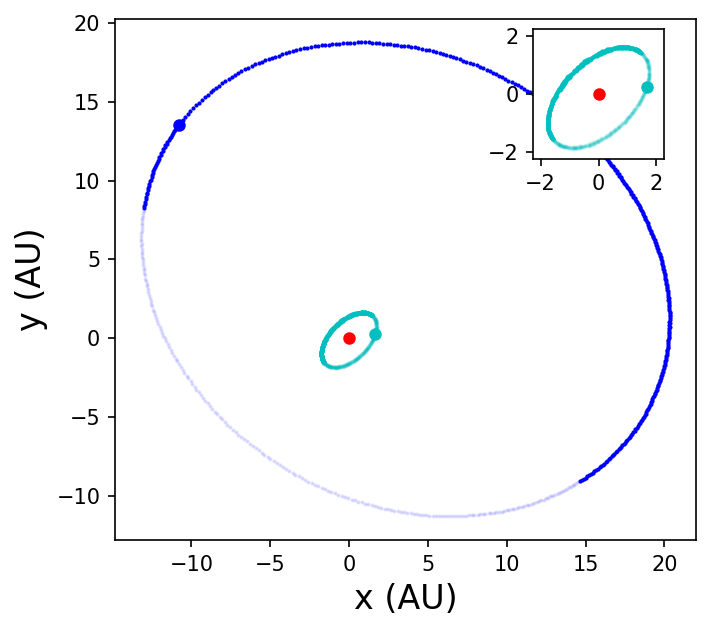

In [263]:
import rebound
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def Rot(ang1,ang2,x):
    rot_omg = np.array([[np.cos(ang1),-np.sin(ang1),0],[np.sin(ang1),np.cos(ang1),0],[0,0,1]])
    rot_inc = np.array([[1, 0, 0], [0,np.cos(ang2),-np.sin(ang2)],[0,np.sin(ang2),np.cos(ang2)]])
    rot_mat = np.dot(rot_omg,rot_inc)
    return np.dot(rot_mat,x)

#plot the simulation
sa = rebound.SimulationArchive(output_bin)

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)
axins = inset_axes(ax, width="100%", height="50%", bbox_to_anchor=(.7, .5, .3, .5), bbox_transform=ax.transAxes)
ax.set_aspect('equal')
axins.set_aspect('equal')

xy_coords = np.zeros((len(sa),9))
for s in range(0,len(sa)):
    sim = sa[s] #iterate through each snapshot in sa
    ps = sim.particles #intermediate object to simplify the referencing
    sim.move_to_hel() #shift to astrocentric coordinates
    for p in range(0,len(ps)):
        Cart = np.array([ps[p].x, ps[p].y, ps[p].z])
        rot_xy = Rot(-ps[2].Omega,-ps[2].inc,Cart)
        xy_coords[s,3*p] = rot_xy[0] 
        xy_coords[s,3*p+1] = rot_xy[1]
        xy_coords[s,3*p+2] = rot_xy[2]

color = ['r','c','b']
for p in range(0,3): 
    pos_z = np.where(xy_coords[:,3*p+2]>=0)[0]  
    neg_z = np.where(xy_coords[:,3*p+2]<0)[0]  
    ax.plot(xy_coords[neg_z,3*p],xy_coords[neg_z,3*p+1],'.',color=color[p],ms=2,alpha=0.1)
    ax.plot(xy_coords[pos_z,3*p],xy_coords[pos_z,3*p+1],'.',color=color[p],ms=2)
    ax.plot(xy_coords[0,3*p],xy_coords[0,3*p+1],'.',color=color[p],ms=10)
    if p == 1:
        axins.plot(xy_coords[neg_z,3*p],xy_coords[neg_z,3*p+1],'.',color=color[p],ms=2,alpha=0.1)
        axins.plot(xy_coords[pos_z,3*p],xy_coords[pos_z,3*p+1],'.',color=color[p],ms=2)
        axins.plot(xy_coords[0,3*p],xy_coords[0,3*p+1],'.',color=color[p],ms=10)
axins.plot(0,0,'r.',ms=10)
axins.set_xlim(-2.25,2.25)
axins.set_ylim(-2.25,2.25)

ax.set_xlabel("x (AU)",fontsize=16)
ax.set_ylabel("y (AU)",fontsize=16);

In the above figure, astrocentric coordinates are used so that we can see the changing position of the planet (cyan) and star B (cyan) relative to the primary star A (red).   

To understand the long-term dynamics, a simulation of at least 50,000 years is needed because the nodal precession timescale for the planet is much longer.  Since we are not as interested in the short-term dynamics, we can increase the number of output steps so that the simulation remains fast (in wall time).

In [264]:
output_bin = "gammaCep_long.bin"
output_steps = 200
simulation(5e4,output_bin,output_steps)

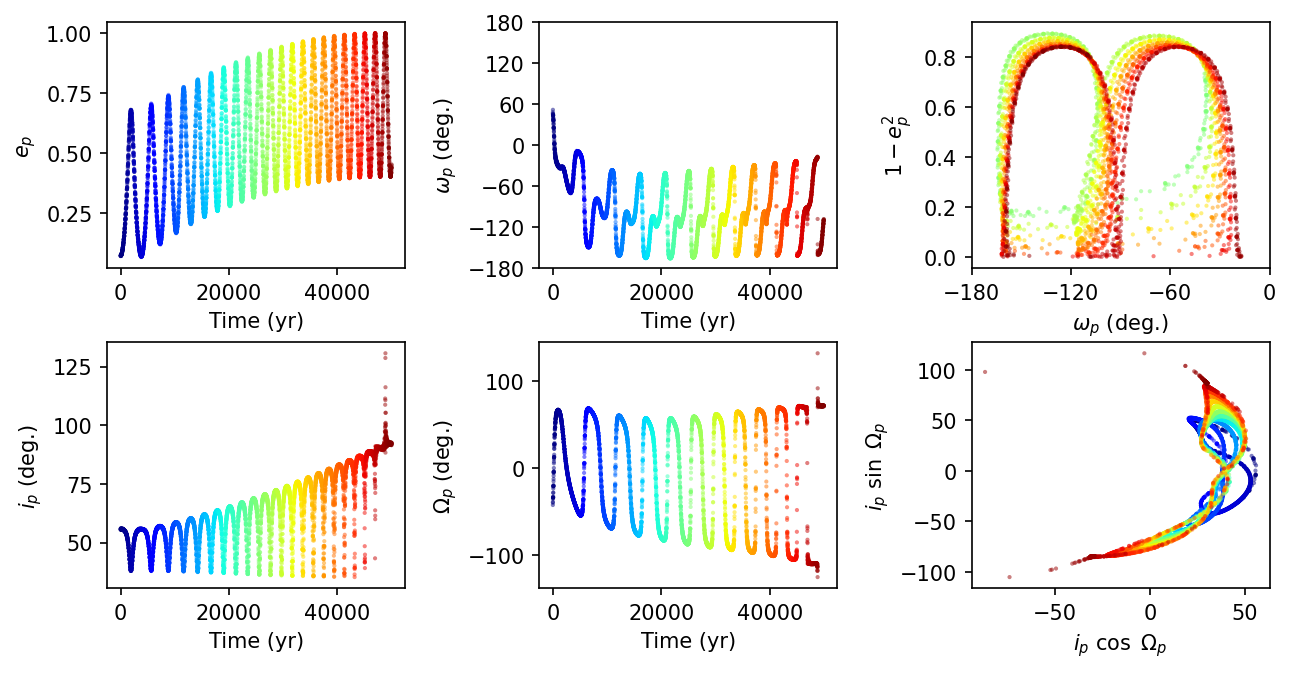

In [265]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm

t_max = 5e4
my_cmap = plt.colormaps['jet']
norm = cm.Normalize(vmin=0, vmax=t_max)

#plot the simulation
sa = rebound.SimulationArchive(output_bin)

fig = plt.figure(figsize=(10,5),dpi=150)
ax11 = fig.add_subplot(231)
ax12 = fig.add_subplot(232)
ax13 = fig.add_subplot(233)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235)
ax23 = fig.add_subplot(236)

pl_orb = np.zeros((len(sa),6))
time = np.zeros(len(sa))
for s in range(0,len(sa)):
    sim = sa[s] #iterate through each snapshot in sa
    ps = sim.particles #intermediate object to simplify the referencing
    sim.move_to_hel() #shift to astrocentric coordinates
    time[s] = sim.t
    del_Omega = ps[2].Omega - ps[1].Omega
    omg_p = ps[1].omega
    if omg_p >= np.pi: omg_p -= 2*np.pi
    mut_incl = np.arccos(np.cos(ps[1].inc)*np.cos(ps[2].inc) + np.sin(ps[1].inc)*np.sin(ps[2].inc)*np.cos(del_Omega))
    pl_orb[s,:] = [ps[1].a,ps[1].e,np.degrees(mut_incl),omg_p,del_Omega,ps[1].M]

ax11.scatter(time,pl_orb[:,1],marker='o',c=time,norm=norm,edgecolor='None',s=4,alpha=0.5,cmap=my_cmap)
ax11.set_ylabel("$e_p$")
ax12.scatter(time,np.degrees(pl_orb[:,3]),marker='o',c=time,norm=norm,edgecolor='None',s=4,alpha=0.5,cmap=my_cmap)
ax12.set_ylabel("$\omega_p$ (deg.)")
start = int(len(sa)/2)
ax13.scatter(np.degrees(pl_orb[start:,3]),1.-pl_orb[start:,1]**2,marker='o',c=time[start:],norm=norm,edgecolor='None',s=4,alpha=0.5,cmap=my_cmap)
ax13.set_ylabel("$1-e_p^2$")

ax11.set_xlabel("Time (yr)")
ax12.set_xlabel("Time (yr)")
ax12.set_yticks(np.arange(-180,180+60,60))
ax13.set_xlabel("$\omega_p$ (deg.)")
ax13.set_xticks(np.arange(-180,60,60))

ax21.scatter(time,pl_orb[:,2],marker='o',c=time,norm=norm,edgecolor='None',s=4,alpha=0.5,cmap=my_cmap)
ax21.set_ylabel("$i_p$ (deg.)")
ax22.scatter(time,np.degrees(pl_orb[:,4]),marker='o',c=time,norm=norm,edgecolor='None',s=4,alpha=0.5,cmap=my_cmap)
ax22.set_ylabel("$\Omega_p$ (deg.)")
ax23.scatter(pl_orb[:,2]*np.cos(pl_orb[:,4]),pl_orb[:,2]*np.sin(pl_orb[:,4]),marker='o',c=time,norm=norm,edgecolor='None',s=4,alpha=0.5,cmap=my_cmap)
ax23.set_ylabel("$i_p\ \sin\ \Omega_p$")

ax21.set_xlabel("Time (yr)")
ax22.set_xlabel("Time (yr)")
ax23.set_xlabel("$i_p\ \cos\ \Omega_p$")

fig.subplots_adjust(wspace=0.45,hspace=0.3);